## Sequence Support

Your goal here is to write a program that obtains the support of a list of sequences, in a sequence database.

The program should take as input the following two files:

FILE1: A list of sequences (one per line) that comprise the dataset. See the file: sequencedb.txt. Lines beginning with '>' are comments, but serve to demarcate one sequence from the next. You may assume that the alphabet will remain Σ={A,C,G,T}.

FILE2: A list of substrings (one per line), i.e., consecutive subsequences, whose supports have to be computed. See the file: seqin.txt.

Your program should output for each sequence in FILE2 the following info:

sequence - support

__Solution__

We are gonna use Spade Algorithm (See the figure below)

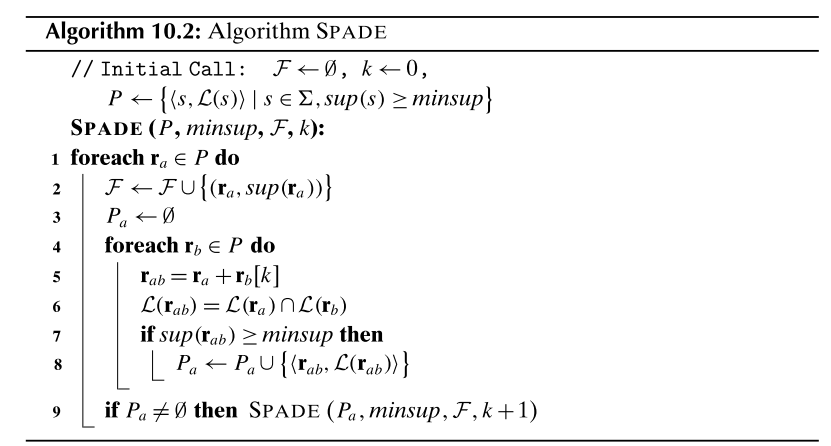

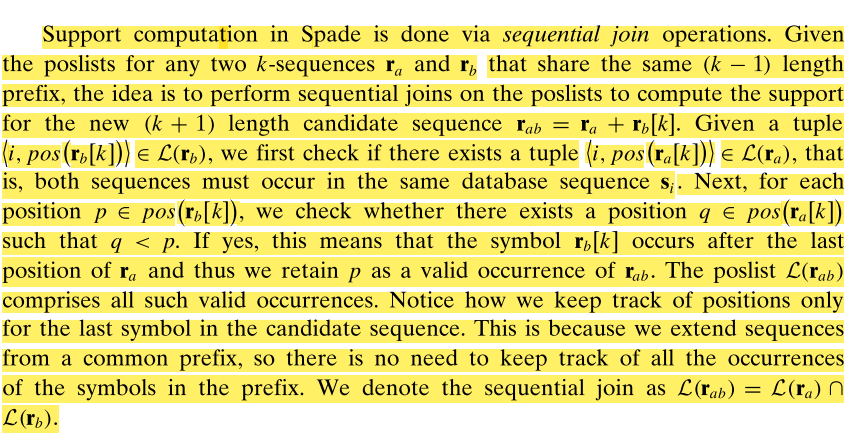

Here an example of the algorithm:

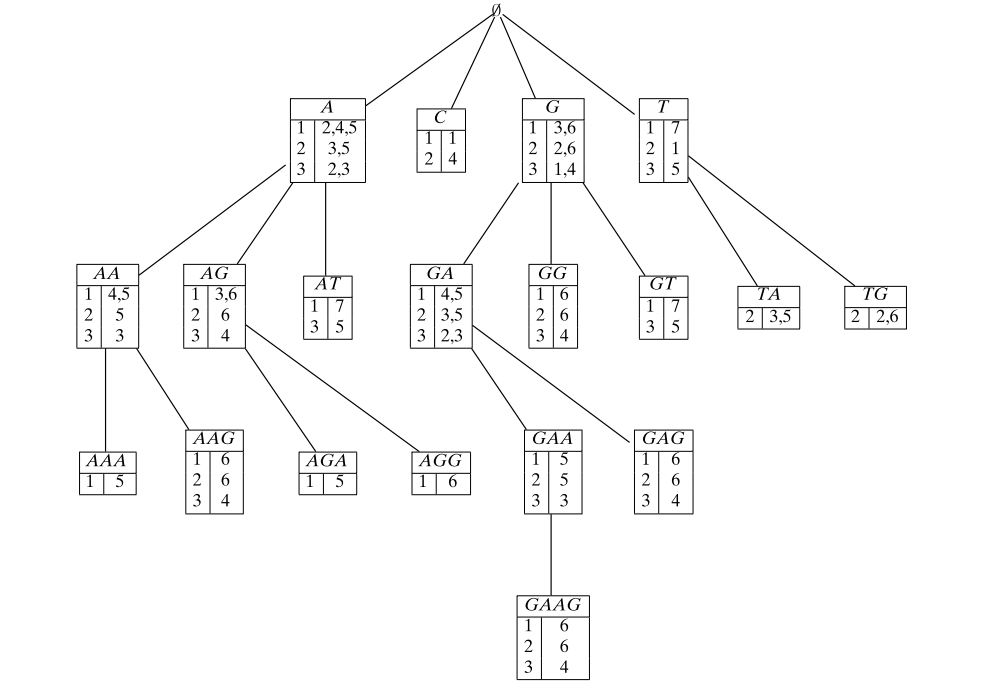

## Importing the libraries and the dataset

In [1]:
import numpy as np

from collections import defaultdict

In [2]:
with open('data/sequencedb.txt', 'r') as f:
    lines = f.readlines()
    sequences_db = [line.strip() for line in lines if not line.startswith('>')]

with open('data/seqin.txt', 'r') as f:
    sequences_query = [line.strip() for line in f.readlines()]

alphabet = ['A', 'C', 'G', 'T']
poslist_db = dict()

In [3]:
class SeqPosList:
    def __init__(self, sequence: str) -> None:
        self.sequence = sequence
        self.pos_list = defaultdict(list)
    

    def sequential_join(self, other: 'SeqPosList') -> 'SeqPosList':
        assert self.sequence[:-1] == other.sequence[:-1], 'Sequences must share the same prefix'
        
        new_pos_list = defaultdict(list)

        for i in other.pos_list:
            if i in self.pos_list:
                for p in other.pos_list[i]:
                    # If exists q in self.pos_list[i] such that q < p, then we retain p
                    if p > self.pos_list[i][0]:
                        new_pos_list[i].append(p)
        
        res = SeqPosList(self.sequence + other.sequence[-1])
        res.pos_list = new_pos_list
        return res

In [4]:

# Preprocessing for each symbol in the alphabet
for symbol in alphabet:
    poslist_db[symbol] = SeqPosList(symbol)

for i in range(len(sequences_db)):
    seq = sequences_db[i]
    for j in range(len(seq)):
        poslist_db[seq[j]].pos_list[i].append(j)


In [5]:
def compute_support(seq: str) -> SeqPosList:
    """Compute the support of a sequence and insert it into the database"""

    # Base case
    if seq in poslist_db:
        return poslist_db[seq]
    
    r_a = compute_support(seq[:-1])
    r_b = compute_support(seq[:-2] + seq[-1])
    
    if len(r_a.pos_list.keys()) == 0 or len(r_b.pos_list.keys()) == 0:
        poslist_db[seq] = SeqPosList(seq)
        return poslist_db[seq]

    r_ab = r_a.sequential_join(r_b)
    poslist_db[seq] = r_ab

    return poslist_db[seq]

In [6]:
for seq in sequences_query:
    compute_support(seq)
    print(f'Support of {seq} is: {len(poslist_db[seq].pos_list.keys())}')

Support of TAT is: 1062
Support of CCAA is: 1061
Support of CAGAA is: 1061
Support of TCATTT is: 1062
Support of GCCG is: 1056
Support of GTCAA is: 1060
Support of ACGT is: 1062
Support of CAAAAAA is: 1062
Support of AAAAAA is: 1062
Support of AGGCT is: 1054
Support of TTTAAACCCGG is: 1038
Support of TAGGCA is: 1053


Let's try out a sequence to see whether we give the correct output.

There are 1062 sequences in the database.
- First we examine which sequence doesn't contain 'CCAA'
- Next we examine which sequence doesn't contain 'CAGAA'
- Finally we examine which sequence doesn't contain 'GTCAA'

In [7]:
set(np.arange(len(sequences_db))).difference(set(list(poslist_db['CCAA'].pos_list.keys()))) 

{31}

In [8]:
sequences_db[31]

'AATAAACAATAGAATAAAAGAAAAAGGAGATGGGAGTATGAGAAAAAA'

In [9]:
set(np.arange(len(sequences_db))).difference(set(list(poslist_db['CAGAA'].pos_list.keys()))) 

{30}

In [10]:
sequences_db[30]

'TTTTTTCTCATACTCCCATCTCCTTTTTCTTTTATTCTATTGTTTATT'

In [11]:
set(np.arange(len(sequences_db))).difference(set(list(poslist_db['GTCAA'].pos_list.keys()))) 

{30, 31}

It seems that we got the correct output.